In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
df = pd.read_csv('loan_2019_20.csv')
df.head()

/var/folders/vw/x5nf6jtd15357ryz17srcdy00000gn/T/ipykernel_32794/2045478829.py:1: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_2019_20.csv')


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,149203043,24000.0,24000.0,24000.0,60 months,13.90%,557.20,C,C1,...,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,473.24,20656.42,557.2,N
1,1,149354242,18500.0,18500.0,18500.0,60 months,14.74%,437.60,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,149355875,24000.0,24000.0,24000.0,36 months,8.19%,754.18,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,149437986,2800.0,2800.0,2775.0,36 months,8.19%,87.99,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,149511512,8800.0,8800.0,8800.0,36 months,20.00%,327.04,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# 1. Data cleaning

### 1.1. Delete all unnecessary columns

In [31]:
columns_to_drop = [
    'loan_amnt',
    'funded_amnt_inv',
    'installment',
    'sub_grade',
    'verification_status',
    'issue_d',
    'pymnt_plan',
    'url',
    'title',
    'zip_code',
    'earliest_cr_line',
    'fico_range_low',
    'fico_range_high',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'revol_util',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'last_fico_range_high',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'open_acc_6m',
    'open_act_il',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_rev_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'revol_bal_joint',
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'deferral_term',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag'
]



In [32]:
df = df.drop(columns=columns_to_drop)

## 1.2. Cleaning loan_status and changing it to dummy.

In [33]:
print(df['loan_status'].value_counts())

loan_status
Current               570868
Fully Paid             66068
Charged Off            13543
Late (31-120 days)      6622
In Grace Period         4384
Issued                  2062
Late (16-30 days)       1197
Default                   80
Name: count, dtype: int64


In [34]:
df = df[~df['loan_status'].str.lower().isin(['fully paid', 'issued'])]
df['loan_status_dummy'] = df['loan_status'].str.lower().isin(['default', 'charged off']).astype(int)

In [35]:
print(df['loan_status'].value_counts())

loan_status
Current               570868
Charged Off            13543
Late (31-120 days)      6622
In Grace Period         4384
Late (16-30 days)       1197
Default                   80
Name: count, dtype: int64


### 1.3. Adding column "region".

In [36]:
northeast = {'CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'}
midwest = {'IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'}
south = {'DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'}
west = {'AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA'}


def get_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df.insert(df.columns.get_loc('addr_state') + 1, 'region', df['addr_state'].map(get_region))

### 1.4. Filling missed values.

In [37]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 emp_title           88691
emp_length          52696
dti                  1221
percent_bc_gt_75     6758
dtype: int64


In [38]:
df.loc[df['emp_length'].isna() & df['emp_title'].isna(), 'emp_length'] = '0 years'
df.loc[df['emp_length'] == '0 years', 'emp_title'] = 'Unemployed'

df = df[~(df['emp_length'].isna() & df['emp_title'].notna())]

df.loc[df['emp_title'].isna() & df['emp_length'].notna(), 'emp_title'] = 'Other'

In [39]:
df['dti'].fillna(df['dti'].mean(), inplace=True)
df['percent_bc_gt_75'].fillna(df['percent_bc_gt_75'].mean(), inplace=True)

/var/folders/vw/x5nf6jtd15357ryz17srcdy00000gn/T/ipykernel_32794/3133795736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dti'].fillna(df['dti'].mean(), inplace=True)
/var/folders/vw/x5nf6jtd15357ryz17srcdy00000gn/T/ipykernel_32794/3133795736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [40]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 Series([], dtype: int64)


### 1.5. Changing values to int's.

In [41]:
np.random.seed(42)

mask_10plus = df['emp_length'] == '10+ years'
df.loc[mask_10plus, 'emp_length'] = np.random.randint(11, 31, size=mask_10plus.sum())
df['emp_length'] = df['emp_length'].replace('< 1 year', '0')
df['emp_length'] = df['emp_length'].str.extract('(\d+)')
df['emp_length'] = df['emp_length'].fillna(0).astype(int)

In [42]:
grade_mapping = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'F': 0
}

df['grade'] = df['grade'].map(grade_mapping)
df['grade'] = df['grade'].fillna(0).astype(int)

In [43]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100
df['int_rate'] = df['int_rate'].round(3)

In [44]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)

### 1.6. Creating dummy columns.

In [45]:
region_dummies = pd.get_dummies(df['region'], drop_first=False).astype(int)
region_dummies.drop(columns=['West'], inplace=True, errors='ignore')
df = pd.concat([df, region_dummies], axis=1)

In [46]:
df['dept_consolidation'] = df['purpose'].apply(lambda x: 1 if x == 'debt_consolidation' else 0)

In [47]:
print(df['home_ownership'].value_counts())
df = df[~df['home_ownership'].str.upper().eq('NONE')]

home_ownership
MORTGAGE    289451
RENT        234927
OWN          70127
ANY           2092
NONE             1
Name: count, dtype: int64


In [48]:
ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=False).astype(int)
ownership_dummies.drop(columns=['ANY'], inplace=True, errors='ignore')
ownership_dummies.rename(columns={
    'RENT': 'Rent', 'OWN': 'Own', 'MORTGAGE': 'Mortgage'
}, inplace=True)
df = pd.concat([df, ownership_dummies], axis=1)

### 1.7. Balancing data.

In [49]:
zeros = df[df['loan_status_dummy'] == 0]
ones = df[df['loan_status_dummy'] == 1]

zeros_sampled = zeros.sample(n=100000, random_state=42)

df = pd.concat([zeros_sampled, ones], ignore_index=True)

### 1.9. Cleaning columns of multicollinearity.

In [50]:
def drop_highly_correlated_features(df, corr_threshold=0.6):
    df_numeric = df.select_dtypes(include=[np.number]).copy()
    corr_matrix = df_numeric.corr().abs()

    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = [(col1, col2) for col1 in upper_tri.columns for col2 in upper_tri.columns 
                       if upper_tri.loc[col1, col2] > corr_threshold]

    to_drop = set()
    col_corr_count = upper_tri.apply(lambda x: (x > corr_threshold).sum(), axis=0).sort_values(ascending=False)

    for col in col_corr_count.index:
        if col in to_drop:
            continue
        correlated = upper_tri.loc[col][upper_tri.loc[col] > corr_threshold].index.tolist()
        for c in correlated:
            if c not in to_drop:
                to_drop.add(c)

    return {
        "high_correlation_pairs": high_corr_pairs,
        "drop_suggestions": list(to_drop),
        "kept_features": [col for col in df_numeric.columns if col not in to_drop]
    }

In [51]:
result = drop_highly_correlated_features(df)

print("Highly correlated pairs:", result["high_correlation_pairs"])
print("Suggested features to drop:", result["drop_suggestions"])
print("Remaining features:", result["kept_features"])


Highly correlated pairs: [('int_rate', 'grade'), ('open_acc', 'total_acc'), ('open_acc', 'num_actv_bc_tl'), ('open_acc', 'num_bc_sats'), ('open_acc', 'num_bc_tl'), ('pub_rec', 'pub_rec_bankruptcies'), ('total_acc', 'num_bc_tl'), ('total_acc', 'num_il_tl'), ('last_fico_range_low', 'loan_status_dummy'), ('num_actv_bc_tl', 'num_bc_sats'), ('num_actv_bc_tl', 'num_bc_tl'), ('num_bc_sats', 'num_bc_tl'), ('Mortgage', 'Rent')]
Suggested features to drop: ['num_il_tl', 'pub_rec_bankruptcies', 'total_acc', 'num_bc_tl', 'num_actv_bc_tl', 'num_bc_sats', 'grade', 'loan_status_dummy', 'Rent']
Remaining features: ['Unnamed: 0', 'id', 'funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'last_fico_range_low', 'tot_cur_bal', 'mort_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'Midwest', 'Northeast', 'South', 'dept_consolidation', 'Mortgage', 'Own']


In [52]:
columns_coll =['pub_rec_bankruptcies', 'num_bc_sats', 'num_il_tl', 'num_bc_tl', 'grade', 'total_acc']
df = df.drop(columns=columns_coll)
df.head()

,Unnamed: 0,id,funded_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,percent_bc_gt_75,total_il_high_credit_limit,loan_status_dummy,Midwest,Northeast,South,dept_consolidation,Mortgage,Own,Rent
0,28422,161947563,28000.0,36,0.117,Wire Man,0,MORTGAGE,74000.0,Current,...,100.000000,0.0,0,0,1,0,1,1,0,0
1,19308,167922888,15000.0,36,0.065,Server,0,RENT,38198.0,Current,...,100.000000,87827.0,0,1,0,0,1,0,0,1
2,7449,149245639,6500.0,36,0.070,Other,1,RENT,35000.0,Current,...,16.700000,28306.0,0,0,0,1,0,0,0,1
3,104620,150330669,22000.0,36,0.076,Unemployed,0,OWN,80000.0,Current,...,20.000000,82121.0,0,1,0,0,0,0,1,0
4,62124,151868551,10000.0,36,0.164,FC Associate,3,RENT,30000.0,Current,...,32.842899,29478.0,0,0,0,0,1,0,0,1


### 1.10. Saving data.

In [53]:
df.to_csv("cleaned_new_data.csv", index=False)
df

,Unnamed: 0,id,funded_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,percent_bc_gt_75,total_il_high_credit_limit,loan_status_dummy,Midwest,Northeast,South,dept_consolidation,Mortgage,Own,Rent
0,28422,161947563,28000.0,36,0.117,Wire Man,0,MORTGAGE,74000.0,Current,...,100.000000,0.0,0,0,1,0,1,1,0,0
1,19308,167922888,15000.0,36,0.065,Server,0,RENT,38198.0,Current,...,100.000000,87827.0,0,1,0,0,1,0,0,1
2,7449,149245639,6500.0,36,0.070,Other,1,RENT,35000.0,Current,...,16.700000,28306.0,0,0,0,1,0,0,0,1
3,104620,150330669,22000.0,36,0.076,Unemployed,0,OWN,80000.0,Current,...,20.000000,82121.0,0,1,0,0,0,0,1,0
4,62124,151868551,10000.0,36,0.164,FC Associate,3,RENT,30000.0,Current,...,32.842899,29478.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113616,12150,168572197,25000.0,36,0.256,Lock Desk Coordinator,1,MORTGAGE,52000.0,Charged Off,...,0.000000,0.0,1,0,0,1,1,1,0,0
113617,12406,168693104,10000.0,36,0.133,Field Marketing Specialist,0,RENT,75000.0,Charged Off,...,0.000000,55751.0,1,0,0,1,1,0,0,1
113618,12479,168690940,20000.0,36,0.161,Software Engineer,0,RENT,88213.0,Charged Off,...,0.000000,0.0,1,0,1,0,1,0,0,1
113619,13244,168644724,17000.0,60,0.161,Sales,2,MORTGAGE,155000.0,Charged Off,...,80.000000,50971.0,1,1,0,0,0,1,0,0


# 3. Logit regression.

In [54]:
df_cleaned = pd.read_csv('cleaned_new_data.csv')
suitable_columns = []

for col in df_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df_cleaned[col]):
        unique_vals = df_cleaned[col].dropna().unique()
        if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1}):
            suitable_columns.append(col)
        elif df_cleaned[col].nunique() > 2:
            suitable_columns.append(col)
print("Columns suitable for logistic regression:")
print(suitable_columns)

Columns suitable for logistic regression:
['Unnamed: 0', 'id', 'funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'last_fico_range_low', 'tot_cur_bal', 'mort_acc', 'num_actv_bc_tl', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'loan_status_dummy', 'Midwest', 'Northeast', 'South', 'dept_consolidation', 'Mortgage', 'Own', 'Rent']


In [55]:

X = df_cleaned[['funded_amnt', 'int_rate', 'emp_length',
              'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
              'pub_rec', 'revol_bal', 'last_fico_range_low',
              'tot_cur_bal', 'mort_acc', 'num_actv_bc_tl',
              'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit',
              'Midwest', 'Northeast', 'South', 'dept_consolidation',
              'Mortgage', 'Own', 'Rent']]


X = sm.add_constant(X)
y = df_cleaned['loan_status_dummy']
logit_model = sm.Logit(y, X)
logit_model = logit_model.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.152023
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:      loan_status_dummy   No. Observations:               113621
Model:                          Logit   Df Residuals:                   113597
Method:                           MLE   Df Model:                           23
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.5854
Time:                        20:22:23   Log-Likelihood:                -17273.
converged:                       True   LL-Null:                       -41663.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         20.8876      0.313     66.640      0.000      

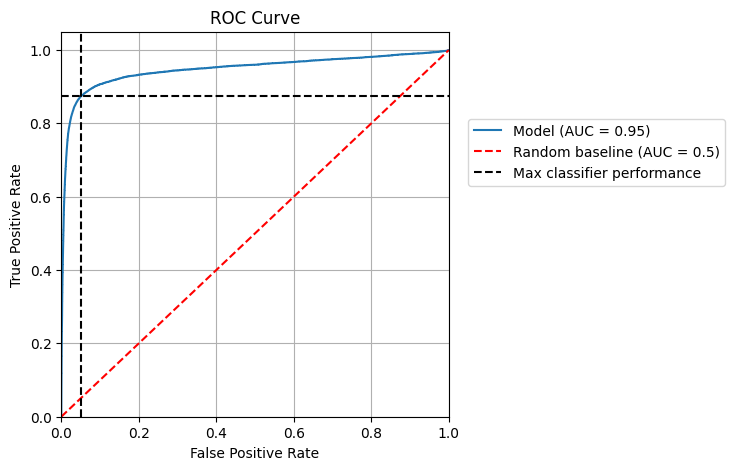

In [56]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = round(roc_auc_score(y_true=y_true, y_score=y_pred_prob), 2)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'Model (AUC = {auc})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random baseline (AUC = 0.5)')

    id_x = pd.Series(abs(tpr - fpr), index=fpr).idxmax()
    plt.axvline(x=id_x, linestyle='dashed', color='black', label='Max classifier performance')
    id_y = pd.Series(abs(tpr - fpr), index=tpr).idxmax()
    plt.axhline(y=id_y, linestyle='dashed', color='black')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc=(1.05, 0.6))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.show()

y_pred_prob = logit_model.predict(sm.add_constant(X)) 
y_true = df['loan_status_dummy']
plot_roc_curve(y_true, y_pred_prob)